Code for Kaggle's Titanic competition

In [1]:
#Importing libs
import pandas as pd #dataframes lib
import numpy as np #vectors lib
from sklearn import preprocessing #pre-processing lib
from sklearn import model_selection # model lib
from sklearn import metrics #metrics  lib
from sklearn.svm import SVC  #use SVM algorithm
from scipy import stats #statistics libs
import statsmodels.api as stm #stats models lib
import seaborn as sns #beauty in graphs
import matplotlib.pyplot as plt #plot graphics
# algorithms: Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA # Principal component analysis

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
# Reading the dataset train
myFileName= "train.csv"
dtfTitanicTrain = pd.read_csv(myFileName, sep=',')
dtfTitanicTest = pd.read_csv("test.csv", sep=',')
dtfTitanicAnswer = pd.read_csv("expected_answer.csv", sep=',')

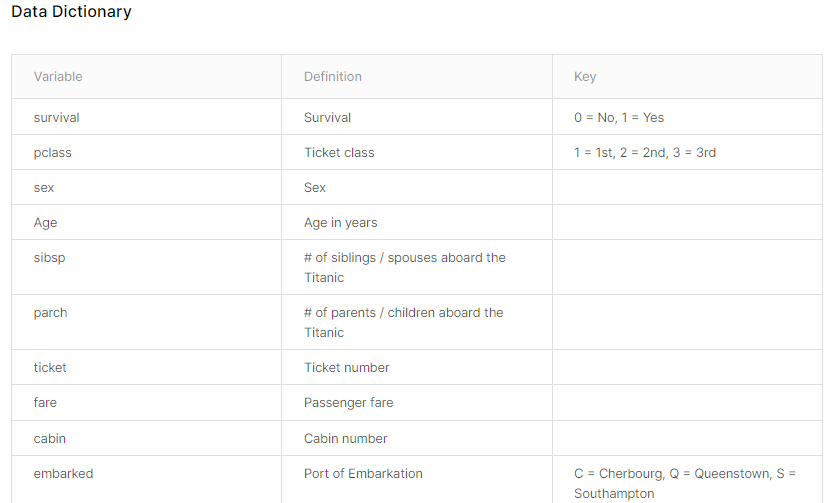

In [3]:
# GETTING INFORMATION - overview about dataset
def gettingInfoAbout (dtFrame):
  print("Info about dataset \n")
  dtFrame.info()

  print("\nColumns in dataset: \n", dtFrame.columns)

  print("\n5 firsts lines in dataset:\n", dtFrame.head())

  print("\nDescribes dataset:\n", dtFrame.describe())
  

# Correlation between columns
def correlationAbout(dtFrame):
  correlationMatrix = dtFrame.corr()
  # Plot the matix correlation between columns
  plt.figure(figsize = (10,7))
  sns.heatmap(correlationMatrix, annot=True)
  plt.show()

# values into each collumn
def uniquesColumnsIn(dtFrame):
  for column in dtFrame.columns:
    uniqueValues = dtFrame[column].unique()
    print("\n**************** COLUMN {} ****************".format(column))    
    print(f"\n{len(uniqueValues)} Uniques values in column: \n{uniqueValues}" )
    print("\n")

In [ ]:
# Calling the info methods
gettingInfoAbout(dtfTitanicTrain)

In [ ]:
# Calling the info methods
uniquesColumnsIn(dtfTitanicTrain)

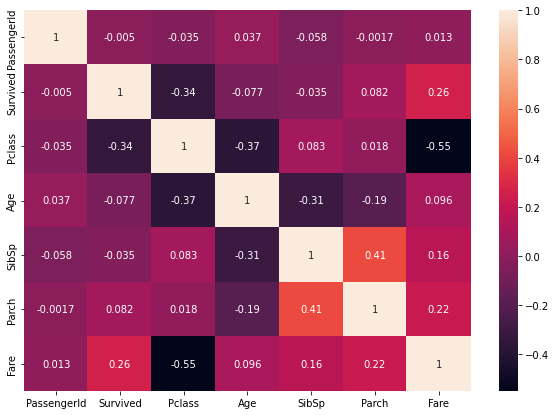

In [6]:
# Calling correlation matrix
correlationAbout(dtfTitanicTrain)

After first insights, let's go to reduce the dataset

In [48]:
# PRE-PROCESSING - refinig dataset
def refinesDataframe(dtFrame):
  print("\nPRE-PROCESSING started...")
  ## copying just columns will be useful to the model
  columnsToBeRemoved = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Fare']
  dtfRefined = dtFrame.drop(columns=columnsToBeRemoved, axis=1, inplace=False)

  ## map for gender
  mapGender = {"female":0, "male":1}
  ### mapping sex to number, because it is a best practice to work a number instead object/text
  dtfRefined['Sex'] = dtfRefined['Sex'].map(mapGender)

  ## filling  each column with their own mean into NaN values, except for 'PassengerId'
  columnMeans = dtfRefined[dtfRefined.columns.drop(['PassengerId'])].mean().to_dict()
  dtfRefined.fillna(columnMeans, inplace=True)
  
  ## Creating bins for Age
  ageBinned = pd.cut(x=dtfRefined['Age'], bins=[0, 15, 29, 49, 69, 100], labels=[0, 0.25, 0.5, 0.75, 1])
  
  ## scalling the values  
  scaleDataframe(dtfRefined)

  dtfRefined['Age'] = ageBinned  

  return dtfRefined

def scaleDataframe (dtfFrame):
    # transform EACH COLUMN in a Scalar (0 until 1), bacause it is a best practice when has 'large' numbers
    myScaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    # running through each column, except 'PassengerId'
    for column in dtfFrame.columns.drop(['PassengerId']):      
      dtfFrame[column] = myScaler.fit_transform(np.array(dtfFrame[column]).reshape(-1, 1))

In [49]:
# PREPARING DATA TRAIN and TEST
## refining the data
dtfRefinedTrain = refinesDataframe(dtfTitanicTrain)
dtfRefinedTest = refinesDataframe(dtfTitanicTest)

## splitting the train data in inputs and outputs
dtfTrainInputs = dtfRefinedTrain.iloc[:, 2:]
dtfTrainOutputs = dtfRefinedTrain.iloc[:, 1]

## splitting the test data in inputs and outputs
dtfTestInputs = dtfRefinedTest.iloc[:, 1:]
dtfExpectedOutputs = dtfTitanicAnswer.iloc[:, 1]

print("\n Finished split data for train and test")


PRE-PROCESSING started...

PRE-PROCESSING started...

 Finished split data for train and test


In [60]:
def exportToCSV(predictions, additionalName):
  ## dataset to be exported
  dtfResult = dtfTitanicTest.filter(items=['PassengerId'])  
  dtfResult['Survived'] = predictions.astype(int)
  
  myFileName = additionalName + "_submission.csv"
  dtfResult.to_csv(myFileName, index=False)

  print("\nExporting with sucess. File: ", myFileName, " with the columns: ", dtfResult.columns.values)

# PERFOMING ALGORITHM - classifiers

In [61]:
## DECISION TREE
clfDecisionTree = DecisionTreeClassifier(random_state=1)
## Training the model
clfDecisionTree.fit(dtfTrainInputs, dtfTrainOutputs)
## Testing the model
outputsPredictedDecisionTree = clfDecisionTree.predict(dtfTestInputs)
# Evaluting the model
accuracyDecisionTree = clfDecisionTree.score(dtfTestInputs, dtfExpectedOutputs)
print("DecisionTree accuracy: ", accuracyDecisionTree)
# exporting the results
exportToCSV(outputsPredictedDecisionTree, "tree")

DecisionTree accuracy:  0.8325358851674641

Exporting with sucess. File:  tree_submission.csv  with the columns:  ['PassengerId' 'Survived']


In [62]:
## KNN - quantity of neighbors is equal to unique values expected
qntNeighbors = dtfTitanicTrain['Survived'].unique().size
print("\nQuantity of Neighbors for KNN: ", qntNeighbors)
clfKNN = KNeighborsClassifier(n_neighbors=qntNeighbors)
## Training the model
clfKNN.fit(dtfTrainInputs, dtfTrainOutputs)
## Testing the model
outputsPredictedKNN = clfKNN.predict(dtfTestInputs)
# Evaluting the model
accuracyKNN = clfKNN.score(dtfTestInputs, dtfExpectedOutputs)
print("KNN accuracy: ", accuracyKNN)
# exporting the results
exportToCSV(outputsPredictedKNN, "knn")


Quantity of Neighbors for KNN:  2
KNN accuracy:  0.8636363636363636

Exporting with sucess. File:  knn_submission.csv  with the columns:  ['PassengerId' 'Survived']


In [63]:
## RANDOM FOREST classifier
clfRandomForest = RandomForestClassifier(max_depth=7, random_state=1)
## Training the model
clfRandomForest.fit(dtfTrainInputs, dtfTrainOutputs)
## Testing the model
outputPredictedRandomForest = clfRandomForest.predict(dtfTestInputs)
# Evaluting the model
accuracyRandomForest = clfRandomForest.score(dtfTestInputs, dtfExpectedOutputs)
print("Random Foresct accuracy: ", accuracyRandomForest)
# exporting the results
exportToCSV(outputPredictedRandomForest, "rforest")

Random Foresct accuracy:  0.8325358851674641

Exporting with sucess. File:  rforest_submission.csv  with the columns:  ['PassengerId' 'Survived']


In [64]:
## SVM classifier
clfSVM = SVC(gamma='auto',kernel='rbf', random_state=1)
## Training the model
clfSVM.fit(dtfTrainInputs, dtfTrainOutputs)
## Testing the model
outputsPredictedSVM = clfSVM.predict(dtfTestInputs)
# Evaluting the model
accuracySVM = clfSVM.score(dtfTestInputs, dtfExpectedOutputs)
print("SVM accuracy: ", accuracySVM)
# exporting the results
exportToCSV(outputsPredictedSVM, "svm")

SVM accuracy:  1.0

Exporting with sucess. File:  svm_submission.csv  with the columns:  ['PassengerId' 'Survived']
